# Multiple sequence alignment

In [13]:
import fem
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [14]:
import os, urllib

# pfam ftp faq: https://pfam.xfam.org/help#tabview=tab13
pfam_current_release = 'ftp://ftp.ebi.ac.uk/pub/databases/Pfam/current_release'
data_dir = '../../data/msa'

files = [
    'Pfam-A.full.gz', # The full alignments of the curated families (~6GB)
    'pdbmap.gz', # Mapping between PDB structures and Pfam domains. (~2MB)
]

for f in files:
    local = os.path.join(data_dir, f)
    if not os.path.exists(local):
        remote = os.path.join(pfam_current_release, f)
        urllib.urlretrieve(remote, local)

In [15]:
import Bio
from Bio import SeqIO

msa = Bio.SeqIO.parse(os.path.join(data_dir, 'PF16592_ncbi.txt'), 'fasta')
msa = np.array([np.array(s.seq) for s in msa]).T

In [4]:
# number of AAs that occur at each residue
m = np.array([len(np.unique(s)) for s in msa])
# filter out residues that less than 3 AAs
msa = msa[m > 1]
m = m[m > 1]
m_cumsum = np.insert(m.cumsum(), 0, 0)
# data dimensions
n, l = msa.shape
print 'sequence length (n): %i, number of sequences (l): %i' % (n, l)
# elements of data matrix
print 'AAs: %s' % (np.unique(msa),)

sequence length (n): 1232, number of sequences (l): 1115
AAs: ['-' 'A' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'K' 'L' 'M' 'N' 'P' 'Q' 'R' 'S' 'T'
 'V' 'W' 'X' 'Y']


In [9]:
import time

start = time.time()
degs, iters = [1], 10
w, d = fem.discrete.fit.fit(msa, degs=degs, iters=iters)
end = time.time()
print '%02f seconds' % (end-start,)

70.470601 seconds


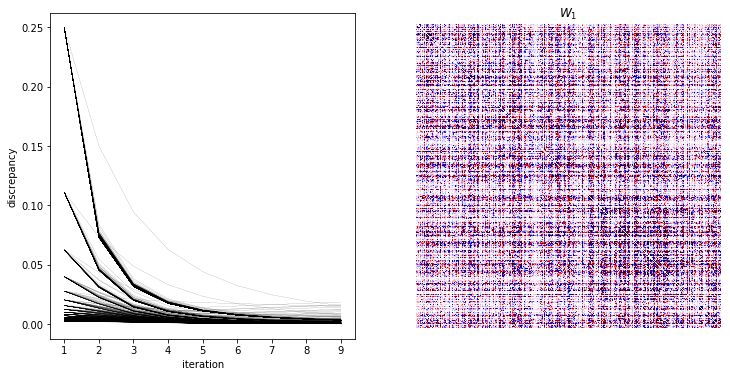

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for di in d:
    ax[0].plot(range(1, iters), di, 'k-', lw=0.1)
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('discrepancy')

scale = 0.01 * np.abs(w[1]).max()

ax[1].imshow(w[1], aspect='equal', cmap=plt.cm.seismic, vmin=-scale, vmax=scale)
ax[1].axis('off')
ax[1].set_title('$W_1$')

plt.show()

In [8]:
# pymol -qcr <script.py>
# ftp://ftp.ebi.ac.uk/pub/databases/Pfam/releases/Pfam31.0/